In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_starting_optic(r,R,k=-1,N=100):
    r=np.linspace(0,r,N) #solves the problem of not having enough points close to the origin
    z=r*r/(R+np.sqrt(R*R-(k+1)*r*r))
    optic=np.array([r,z])
    return optic

In [3]:
def plot_cdz(title,cdz):
    fig, ax = plt.subplots(figsize=(12,10))
    zeros=np.zeros((len(cdz),1))
    cdz=np.hstack((zeros,cdz))
    n_iter=len(cdz)
    if n_iter>100:
        steps=len(cdz)//100
        cdz=cdz[::steps]
    im=ax.imshow(np.array(cdz/5e-7).T,origin='lower')
    ax.figure.colorbar(im,fraction=0.046, pad=0.04)
    plt.xlabel('iterations')
    plt.ylabel('r(m)')
    No=len(cdz[0])+1
    y_positions=np.linspace(0,No,6)
    step=No//5
    y_labels=np.append(o_r[::step],o_r[-1])
    ax.set_yticks(y_positions)
    ax.set_yticklabels(['{:.3e}'.format(y) for y in y_labels])
    
    if n_iter>100:
        x_positions=np.linspace(0,100,6)
        x_labels=np.linspace(0,n_iter-1,6).astype(int)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(['{:d}'.format(x) for x in x_labels])

    plt.tight_layout()
    plt.savefig(title+'_plot_cdz.png')
    plt.show()

In [4]:
def plot_diff(title,o_z,o_r,r,R):
    oz=np.copy(o_z)*-1
    fig, ax = plt.subplots(figsize=(12,10))
    No=len(o_r)
    start_o=oz[0]
    end_o=create_starting_optic(r,R,k=-1,N=No)[1][1:]
    #total_change=end_o+start_o[1:]
    exp_o=np.tile(end_o,(len(o_z),1))
    #print(exp_o[0])
    oz[:,1:]+=exp_o
    #oz[:,1:]/=total_change
    #print(oz[0])
    n_iter=len(oz)
    if n_iter>100:
        steps=len(oz)//100
        oz=oz[::steps]

    im=ax.imshow(np.array(oz).T,origin='lower')
    ax.figure.colorbar(im,fraction=0.046, pad=0.04)
    plt.xlabel('iterations')
    plt.ylabel('r(m)')
    step=No//5
    y_positions=np.linspace(0,No,6)
    y_labels=np.append(o_r[::step],o_r[-1])
    ax.set_yticks(y_positions)
    ax.set_yticklabels(['{:.3e}'.format(y) for y in y_labels])
    
    if n_iter>100:
        x_positions=np.linspace(0,100,6)
        x_labels=np.linspace(0,n_iter-1,6).astype(int)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(['{:d}'.format(x) for x in x_labels])

    plt.tight_layout()
    plt.savefig(title + "_plot_diff.png")
    plt.show()

In [5]:
paths=[ f.path for f in os.scandir("/Users/gracekim/flying_focus/FF_rays/lr_test/") if f.is_dir() ]
# paths.remove('/Users/gracekim/flying_focus/FF_rays/.git')
# paths.remove('/Users/gracekim/flying_focus/FF_rays/.ipynb_checkpoints')
# paths.remove('/Users/gracekim/flying_focus/FF_rays/plots')
paths.sort()

In [6]:
titles=[x.split('/')[-1] for x in paths]

In [7]:
p=paths[0]
t=titles[0]
os.chdir(p)
cdz=np.genfromtxt(t+'_cdz.csv')
o_r=np.genfromtxt(t+'_o_r.csv')
o_z=np.genfromtxt(t+'_o_z.csv')
eo=create_starting_optic(0.0375,0.1125,k=-1,N=100)
so=create_starting_optic(0.0375,0.1125,k=-0.5,N=100)

#print(o_z[0]-eo[1])
#plot_cdz(t,cdz)
#plot_diff(t,o_z,o_r,0.0375,0.1125)

In [8]:
len(cdz)//100

10

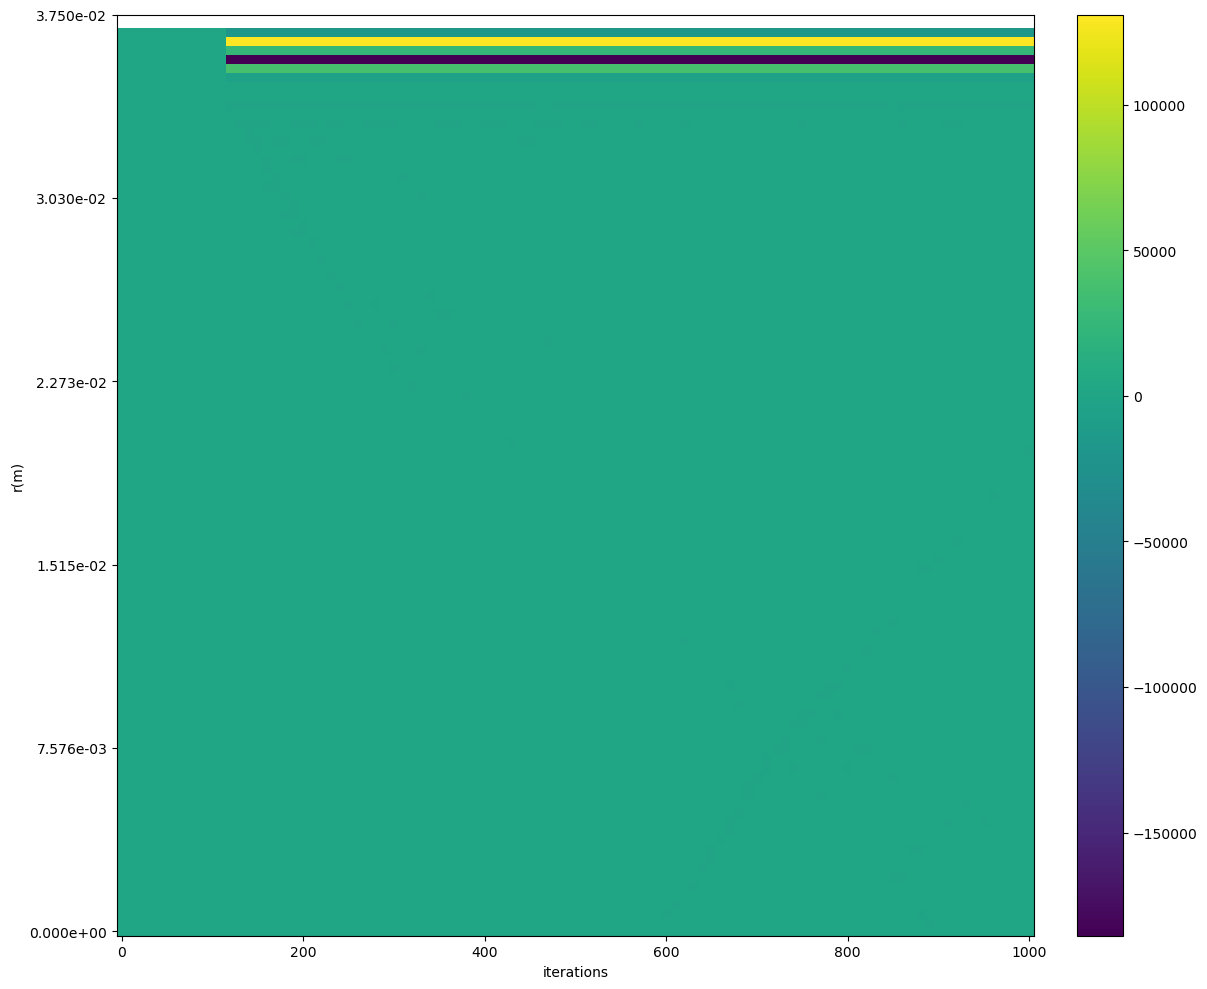

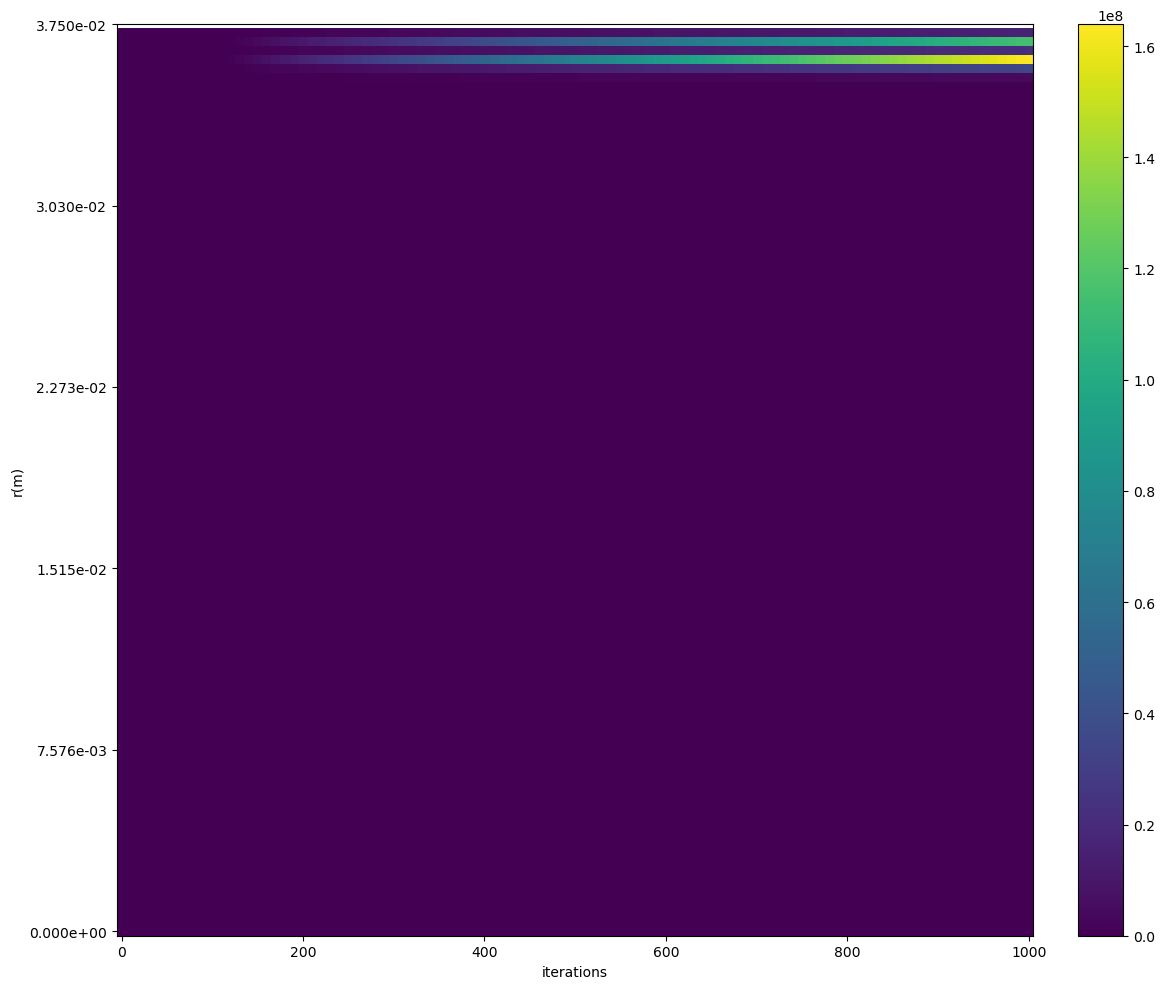

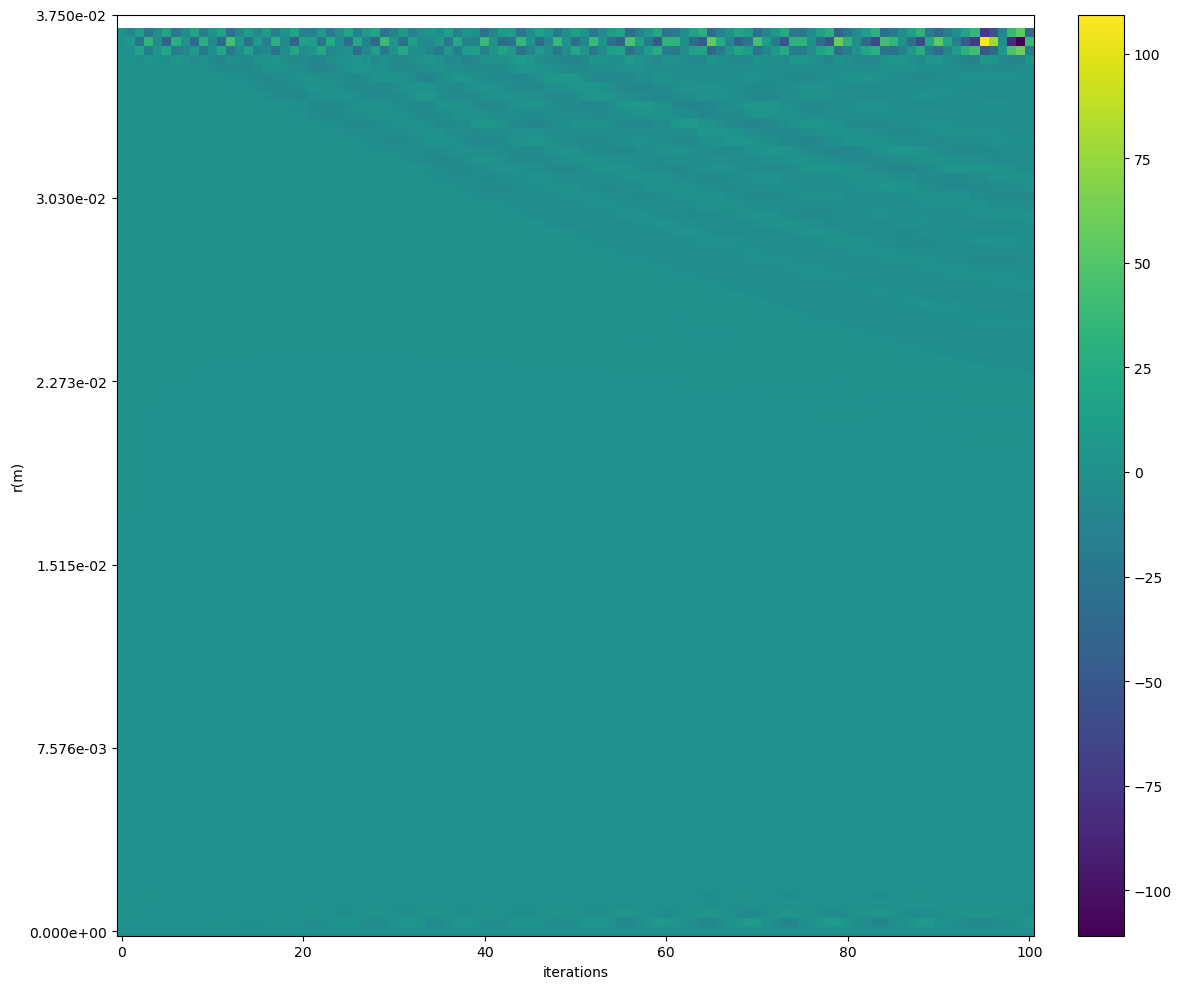

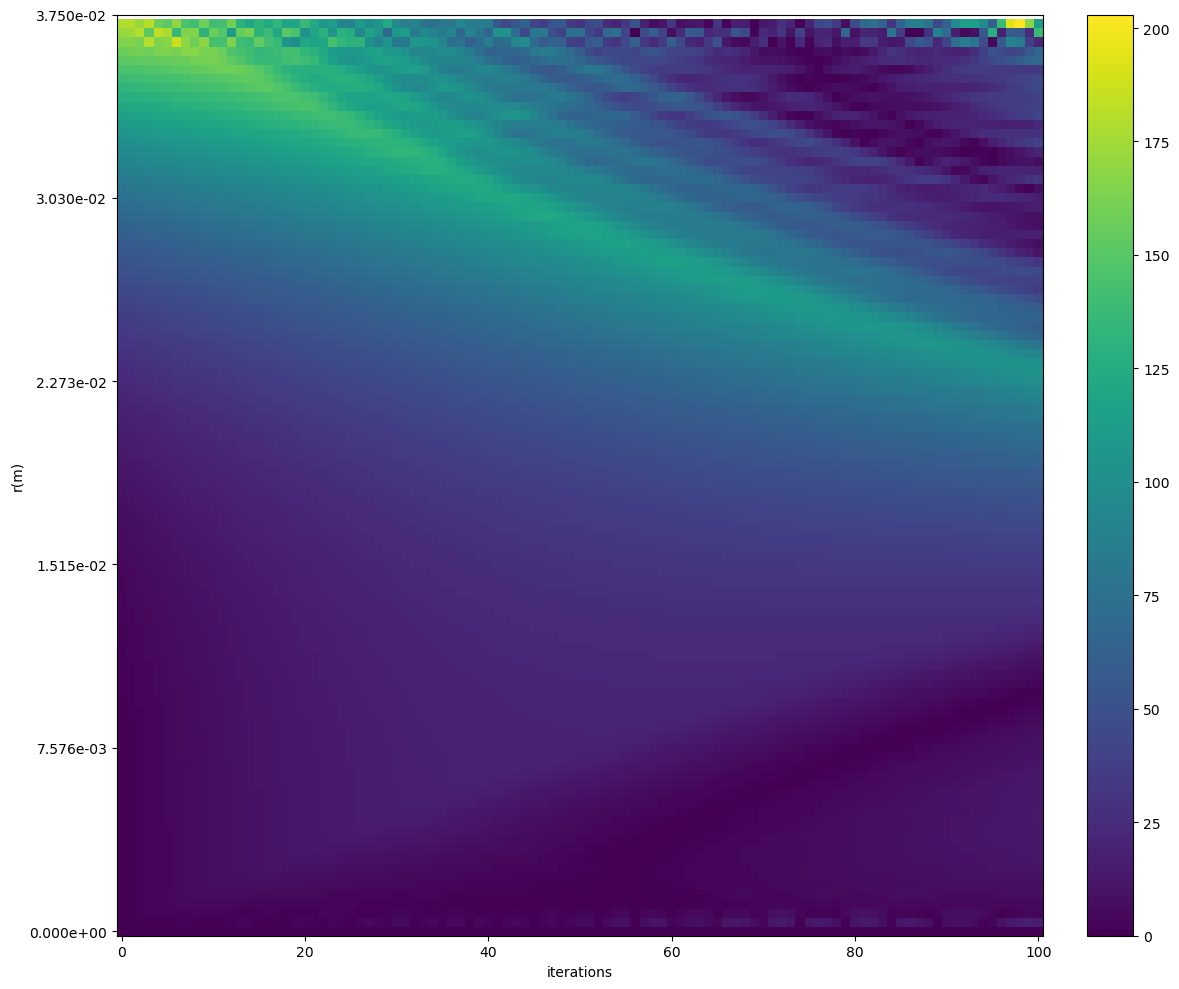

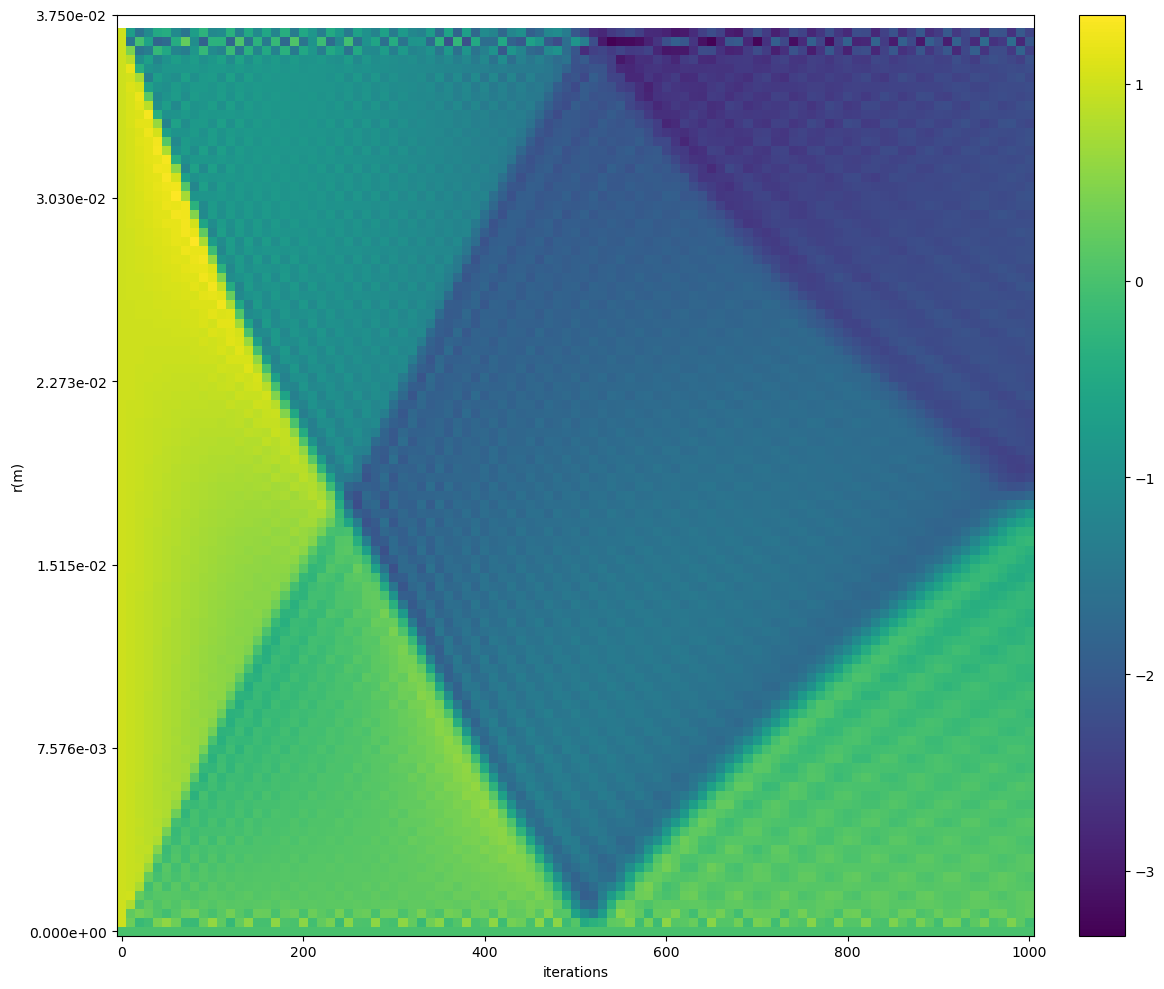

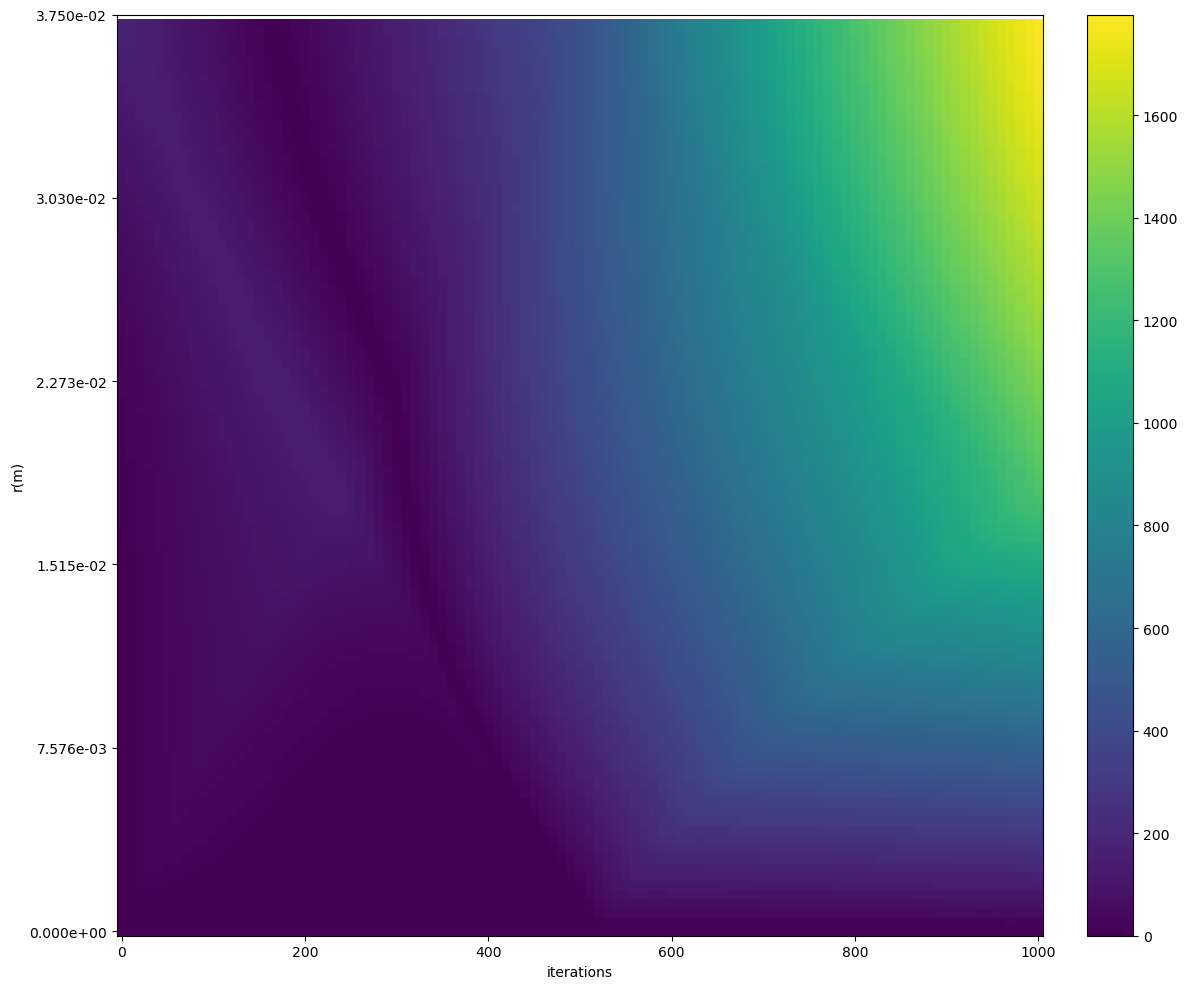

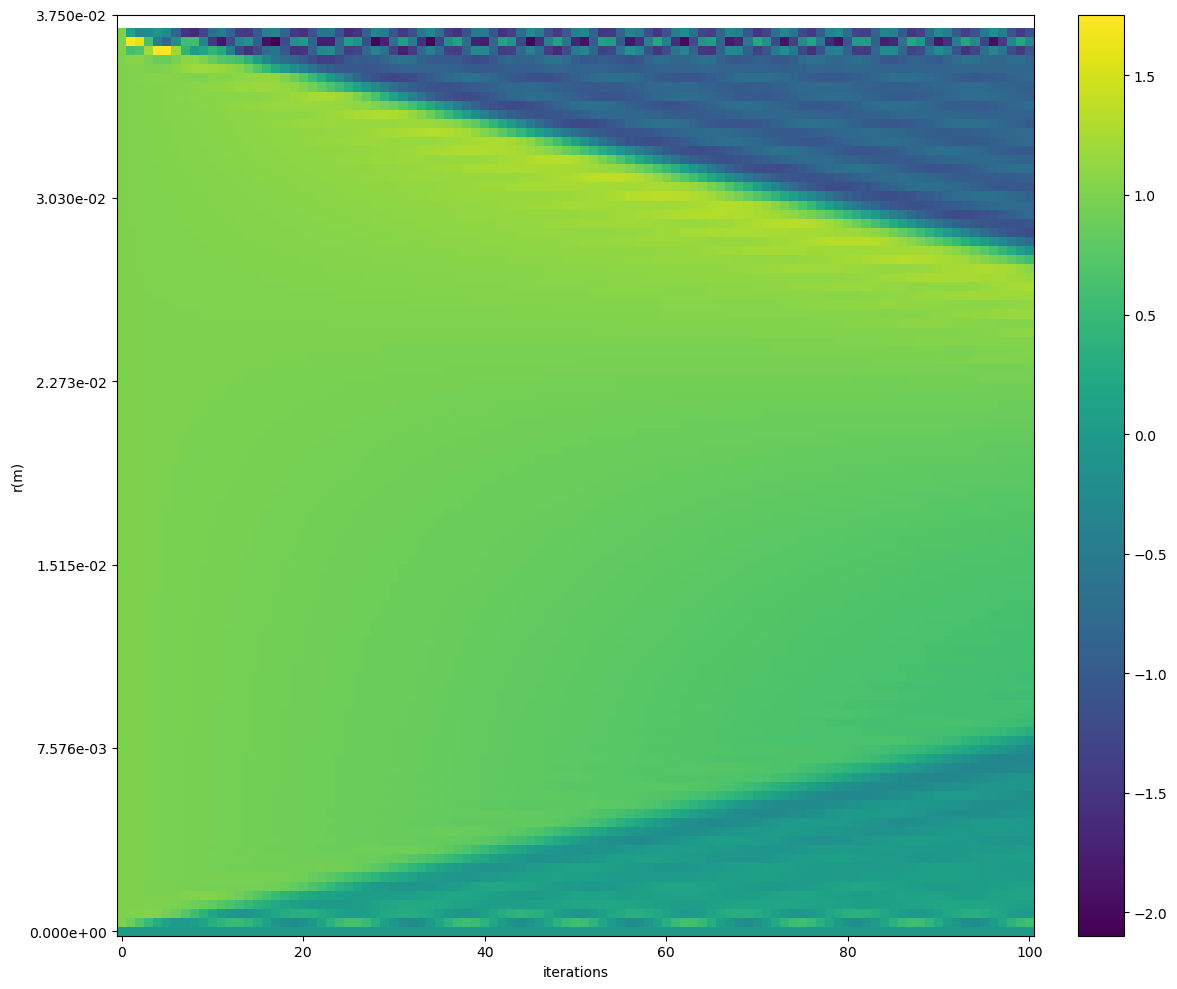

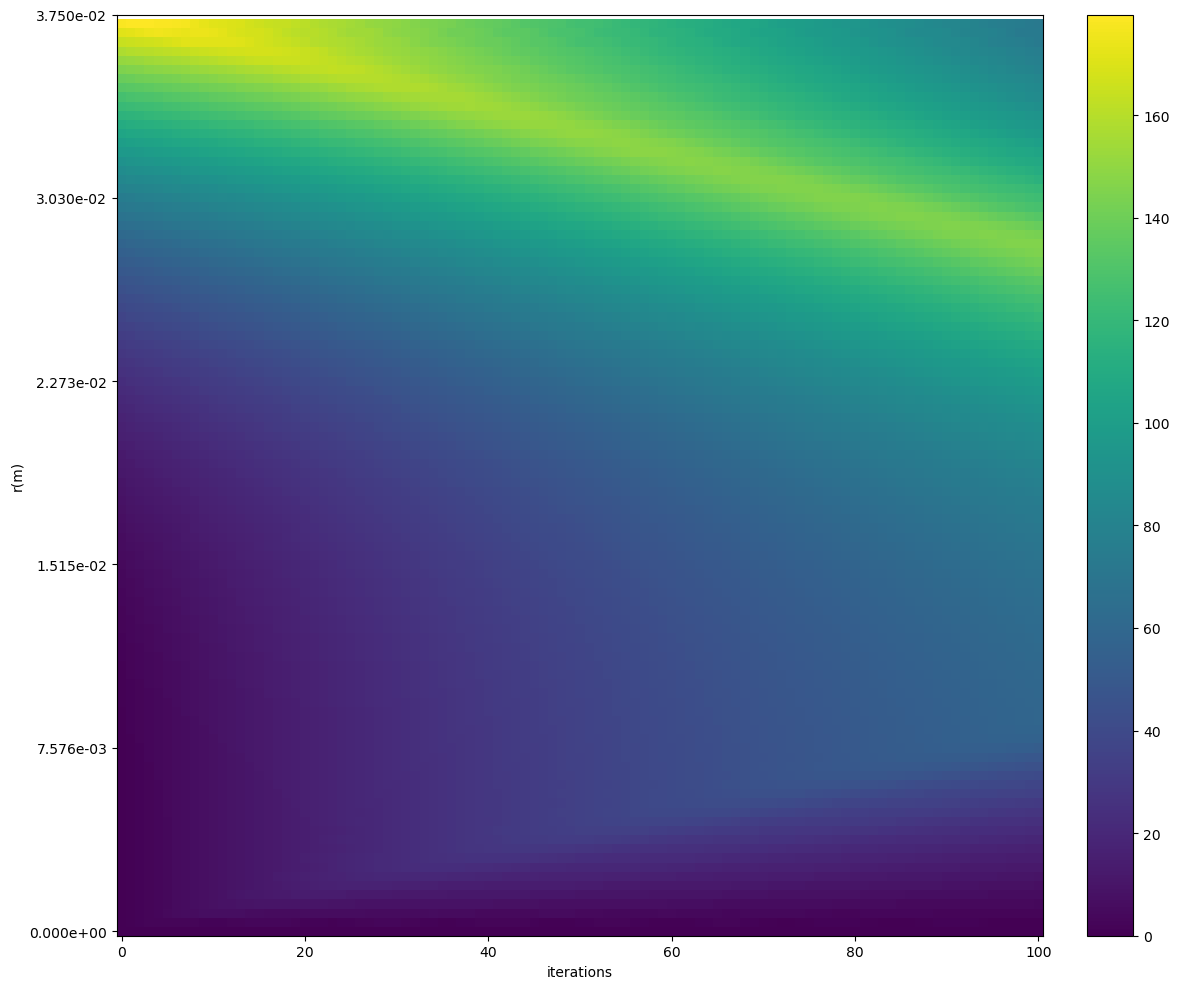

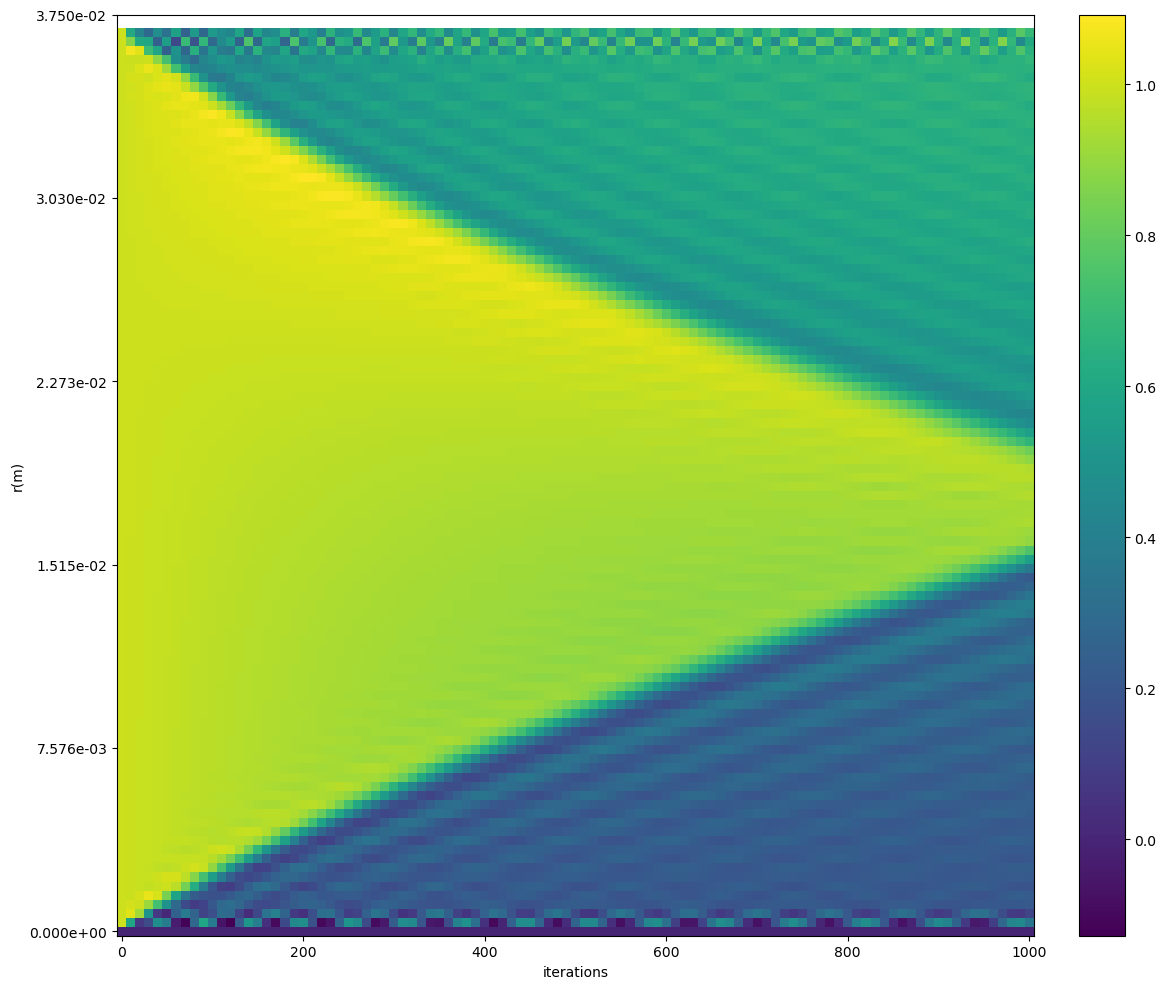

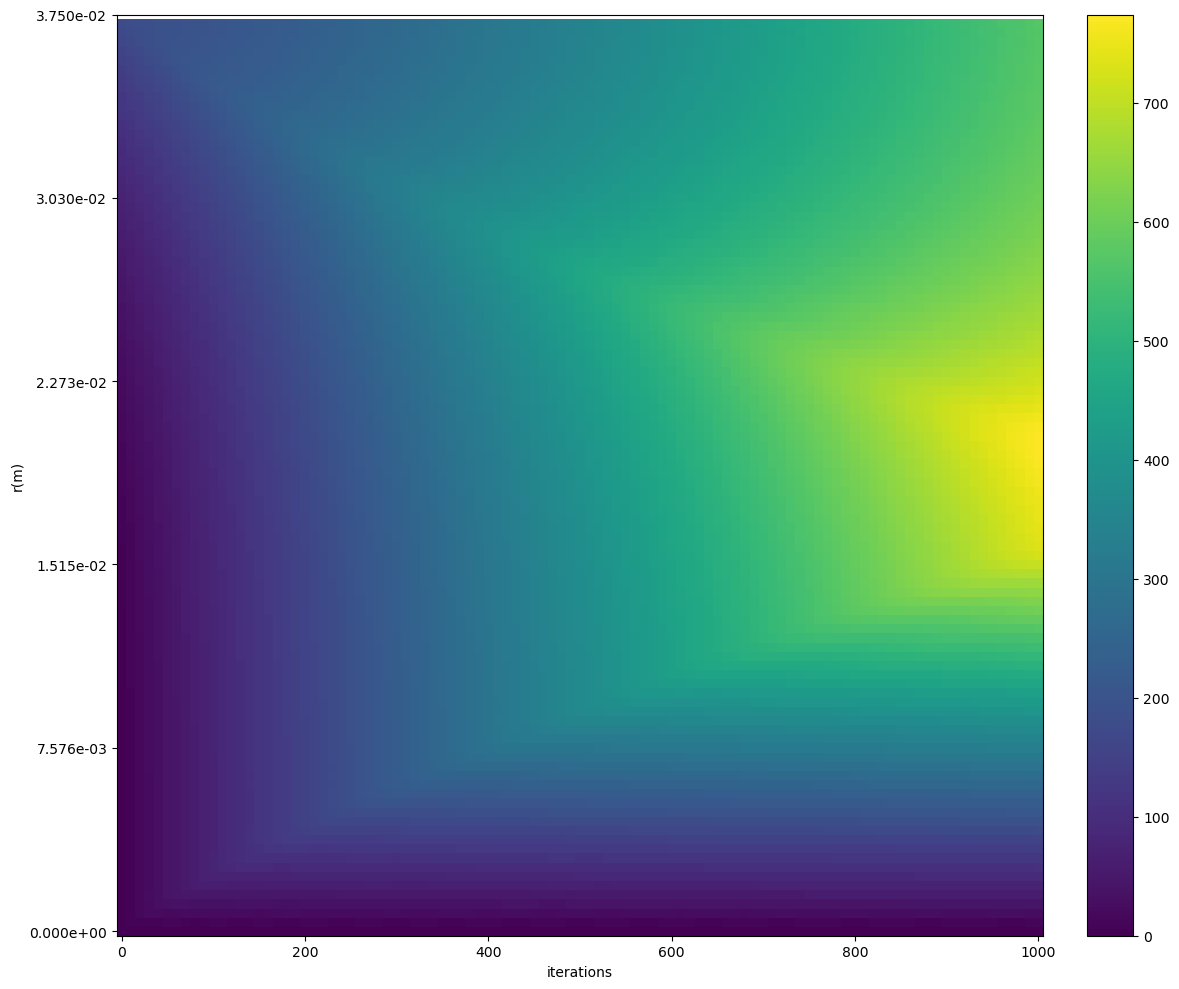

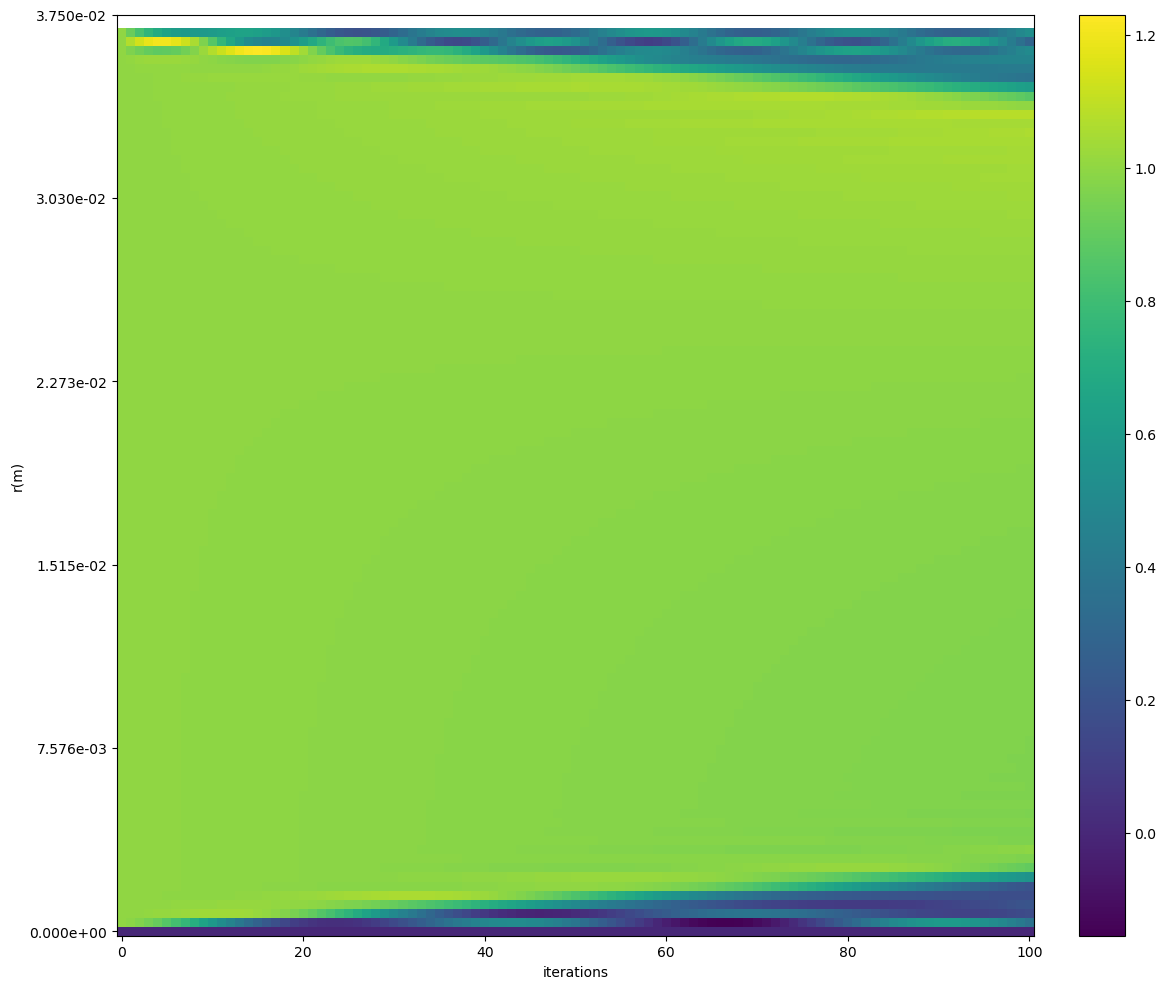

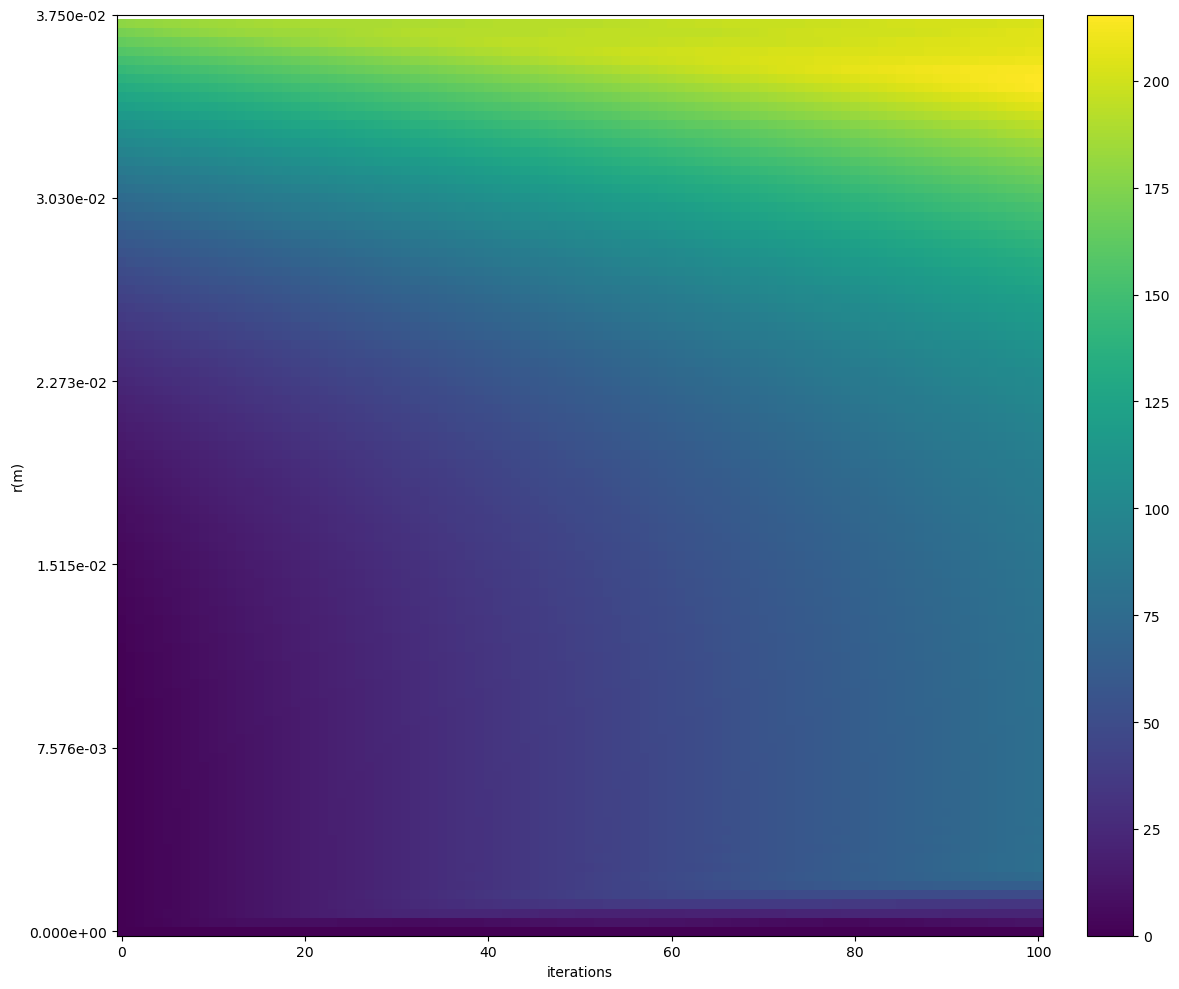

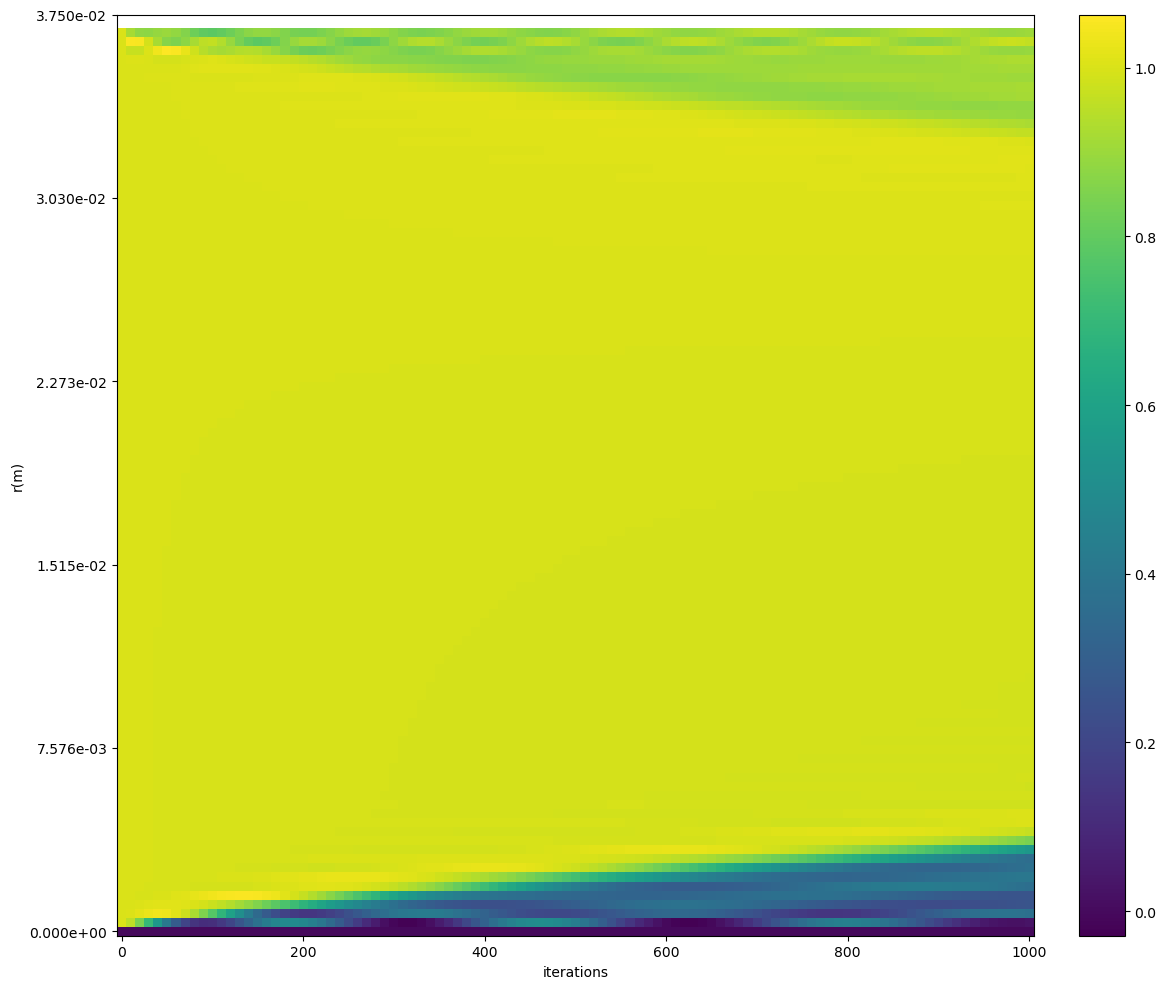

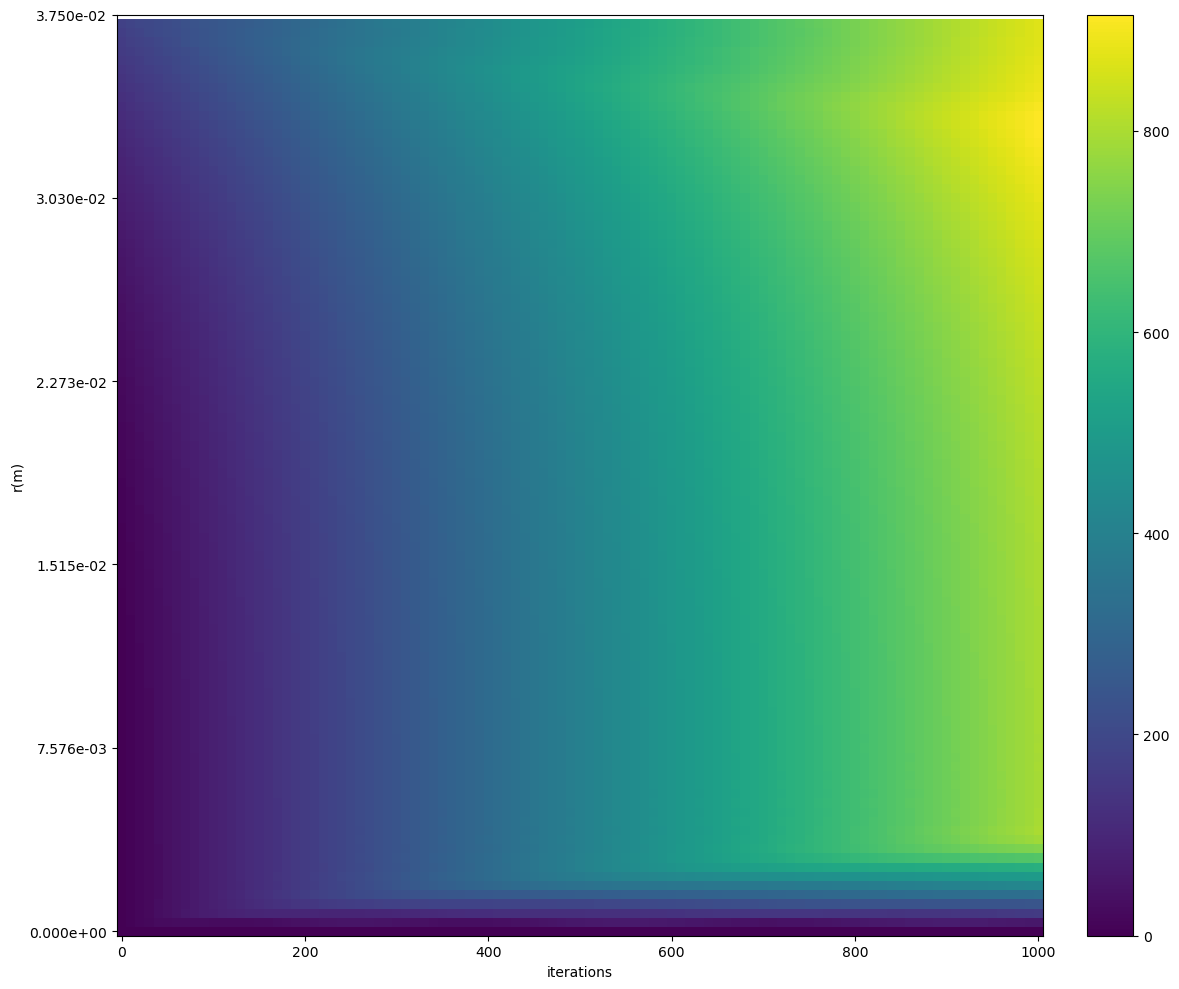

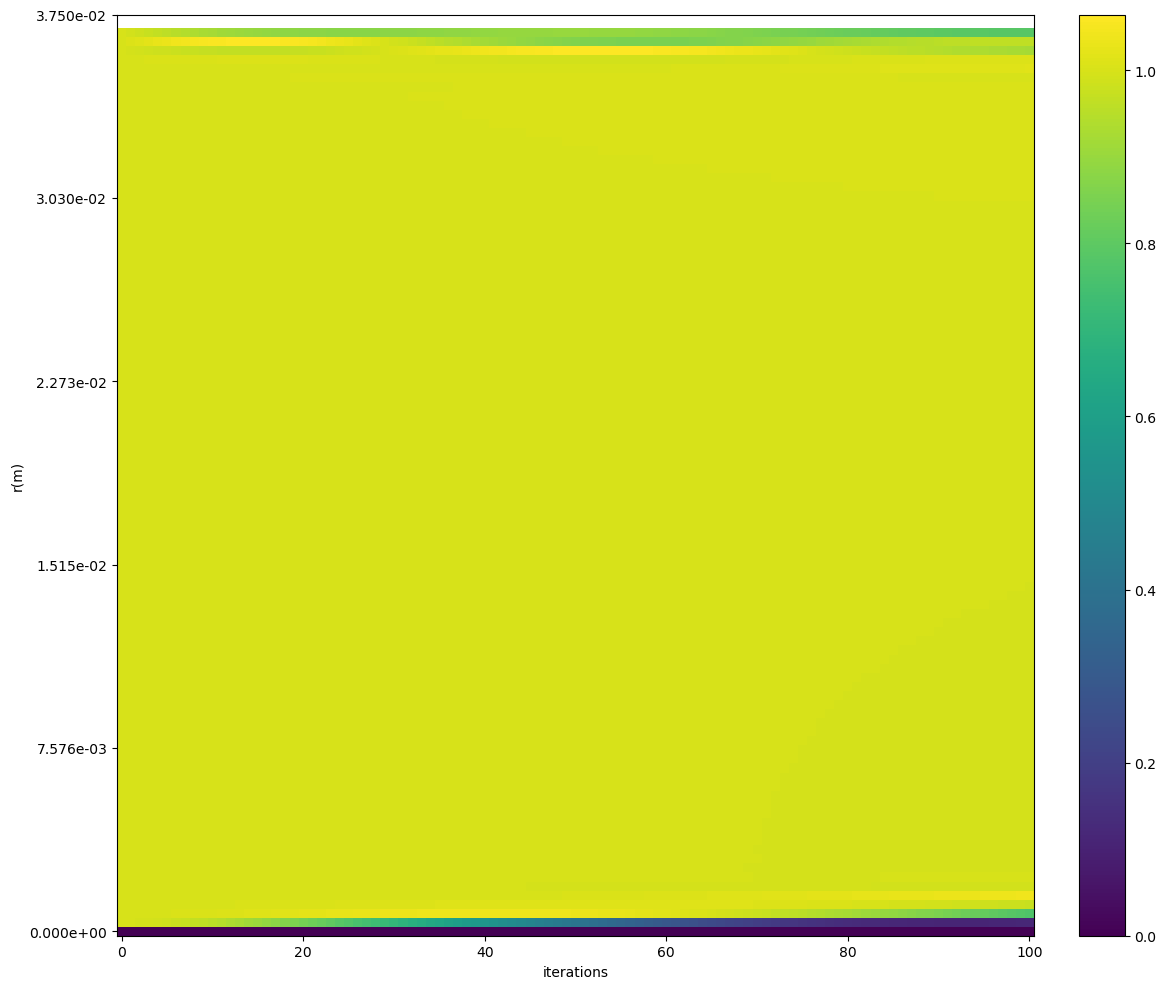

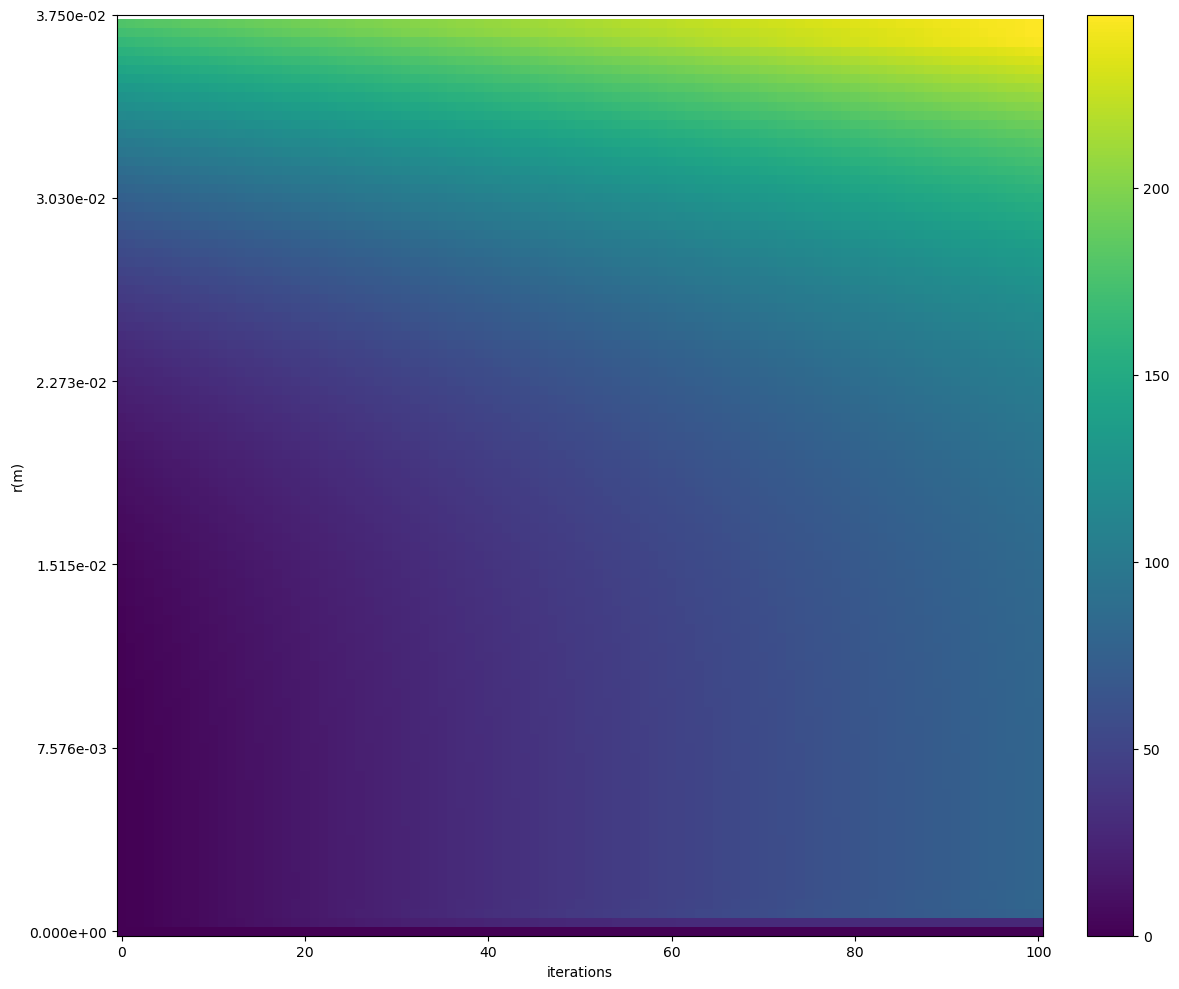

In [9]:
for t,p in zip(titles,paths):
    os.chdir(p)
    cdz=np.genfromtxt(t+'_cdz.csv')
    o_r=np.genfromtxt(t+'_o_r.csv')
    o_z=np.genfromtxt(t+'_o_z.csv')
    
    plot_cdz(t,cdz)
    plot_diff(t,o_z,o_r,0.0375,0.1125)